Final Path: ['Braj Ki Rasoi', 'Route B', 'Route C', 'Saroj Boys Hostel'], Total Distance: 17.00


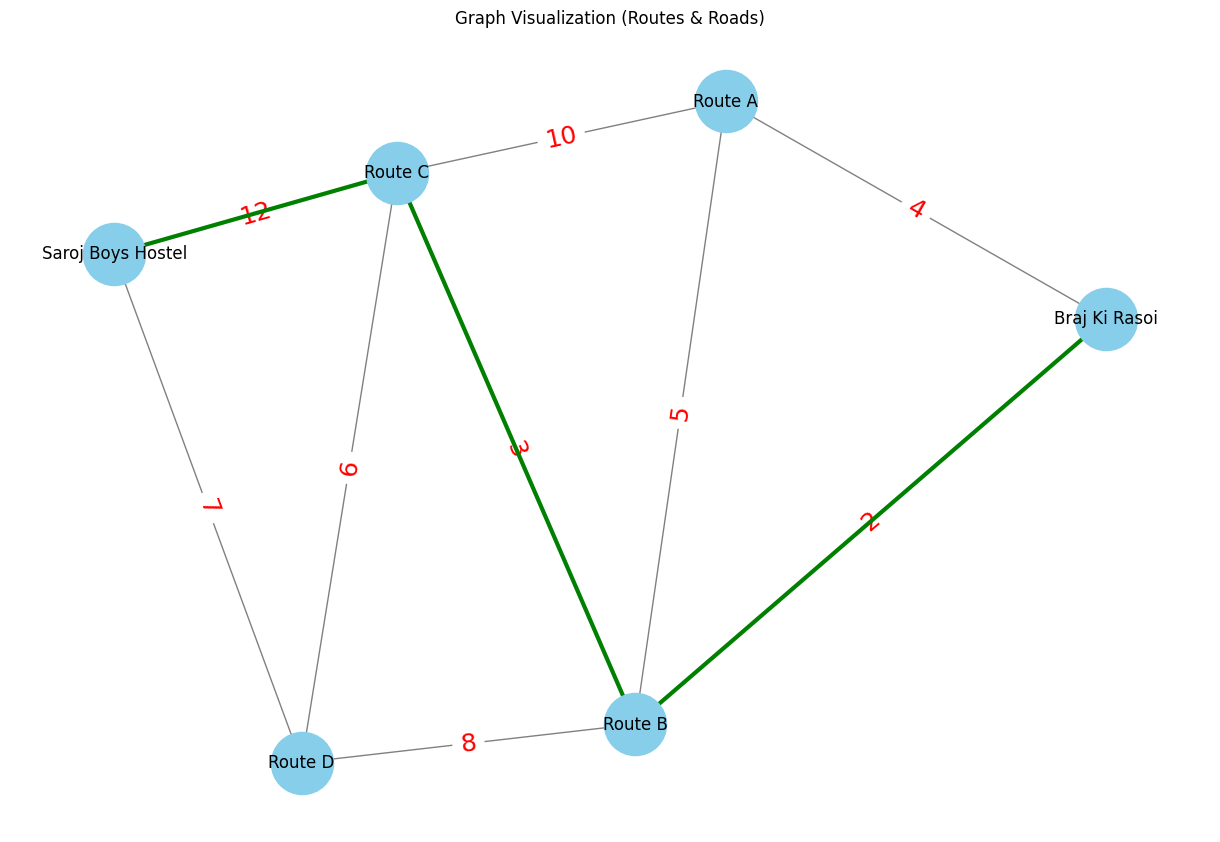

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import heapq
import pandas as pd
from IPython.core.display import display, HTML


class FoodDeliveryGraph:
    def __init__(self, locations):
        self.locations = locations
        self.edges = {location: [] for location in locations}

    def add_edge(self, src, dest, weight):
        self.edges[src].append((dest, weight))
        self.edges[dest].append((src, weight))


def simulate_ml_model():

    X_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
    y_train = np.ones_like(X_train.flatten())
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


def predict_weight(base_weight, model, time_slot):

    traffic_factor = model.predict([[time_slot]])[0]
    return base_weight * traffic_factor


def dijkstra_ml(graph, start, target, model, time_slot):
    distances = {node: float('inf') for node in graph.locations}
    distances[start] = 0
    pq = [(0, start)]
    previous = {node: None for node in graph.locations}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_node == target:
            path = []
            while current_node:
                path.insert(0, current_node)
                current_node = previous[current_node]
            print(f"Final Path: {path}, Total Distance: {distances[target]:.2f}")
            return distances[target], path

        for neighbor, base_weight in graph.edges[current_node]:
            adjusted_weight = predict_weight(base_weight, model, time_slot)
            distance = current_distance + adjusted_weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return float('inf'), []


def visualize_graph_with_metrics(graph, shortest_path=None):
    nx_graph = nx.Graph()
    for src in graph.locations:
        for dest, weight in graph.edges[src]:
            nx_graph.add_edge(src, dest, weight=weight)

    pos = nx.spring_layout(nx_graph, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(nx_graph, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, edge_color="gray")
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=nx.get_edge_attributes(nx_graph, "weight"),
                                 font_size=18, font_color="red")
    if shortest_path:
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(nx_graph, pos, edgelist=path_edges, edge_color="green", width=3)
    plt.title("Graph Visualization (Routes & Roads)")
    plt.show()

def display_html_results(distance, path):
    html_content = f"""
    <h1>Delivery Path Results</h1>
    <h2>Dijkstra's Shortest Path</h2>
    <p><strong>Distance:</strong> {distance:.2f}</p>
    <p><strong>Path:</strong> {' → '.join(path)}</p>
    """
    display(HTML(html_content))


def food_delivery_example():
    locations = ["Braj Ki Rasoi", "Route A", "Route B", "Route C", "Route D", "Saroj Boys Hostel"]
    graph = FoodDeliveryGraph(locations)
    graph.add_edge("Braj Ki Rasoi", "Route A", 4)
    graph.add_edge("Braj Ki Rasoi", "Route B", 2)
    graph.add_edge("Route A", "Route B", 5)
    graph.add_edge("Route A", "Route C", 10)
    graph.add_edge("Route B", "Route C", 3)
    graph.add_edge("Route B", "Route D", 8)
    graph.add_edge("Route C", "Route D", 6)
    graph.add_edge("Route D", "Saroj Boys Hostel", 7)
    graph.add_edge("Route C", "Saroj Boys Hostel", 12)


    model = simulate_ml_model()
    time_slot = 3


    start_location = "Braj Ki Rasoi"
    target_location = "Saroj Boys Hostel"
    distance, path = dijkstra_ml(graph, start_location, target_location, model, time_slot)

    visualize_graph_with_metrics(graph, shortest_path=path)
    display_html_results(distance, path)


food_delivery_example()
